<a href="https://colab.research.google.com/github/Arkaprabha1012/Datascience/blob/master/reinforcementnlpml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#APRIORI
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset
dataset=pd.read_csv("Market_Basket_Optimisation.csv",header=None)
#making the total transactions as list
transactions=[]
for i in range(0,7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0,20)])

#Train Apriori Model in The dataset
'''Product purchased 3 times a day and 7 days so 3*7=21 product 
purchased and the support will be 21/(total no of transactions)=
21/7500=0.0028~0.003  
we have set the min_confidence as less as we can give
now min_lift ,we set it to 3'''
from apyori import apriori
rules=apriori(transactions,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2)

#Visualizing the result
results=list(rules)

In [3]:
#ECLAT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset
dataset=pd.read_csv("Market_Basket_Optimisation.csv",header=None)
transactions=[]
for i in range(0,7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0,20)])

#NO SKLEARN PACKAGE TO IMPLEMENT ECLAT
#THAT IS WHY WE WILL USE mlxtend

#Encoding the data
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(transactions).transform(transactions)
df_x=pd.DataFrame(te_ary,columns=te.columns_)

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
df_sets=apriori(df_x,min_support=0.003,use_colnames=True)
df_rules=association_rules(df_sets,metric='support',min_threshold=0.003,support_only=True)

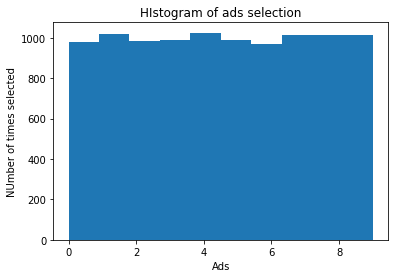

In [4]:
#REINFORCEMENT LEARNING :RANDOM SELECTION
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv("Ads_CTR_Optimisation.csv")

#implementing random selection
import random
total_users=10000
no_ads=10
ads_selected=[]
total_reward=0
for i in range(0,total_users):
    ad=random.randrange(no_ads)
    ads_selected.append(ad)
    reward=dataset.values[i,ad]
    total_reward=total_reward+reward
    
#Visualizing
plt.hist(ads_selected)
plt.title('HIstogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('NUmber of times selected')
plt.show()

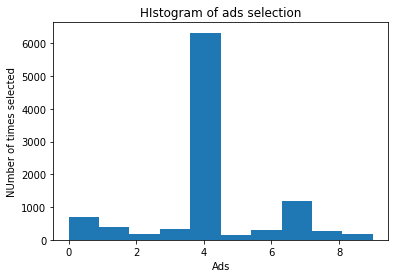

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Randomly selected ads have got the total_reward 1224 this time
#as you select it will be near 1200 almost.
#implement Ucb to maximise the total rewards

#importing the dataset
dataset=pd.read_csv("Ads_CTR_Optimisation.csv")

#Implementing UCB
import math
total_users=10000
no_ads=10
ads_selected=[]
number_selections=[0]*no_ads
sums_rewards=[0]*no_ads
total_reward=0
for n in range(0,total_users):
    ad=0
    max_upper_bound=0
    for i in range(0,no_ads):
        if(number_selections[i]>0):
            average_reward=sums_rewards[i]/number_selections[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/number_selections[i])
            upper_bound=average_reward+delta_i
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    number_selections[ad]=number_selections[ad]+1
    reward=dataset.values[n,ad]
    sums_rewards[ad]=sums_rewards[ad]+reward
    total_reward=total_reward+reward
    
plt.hist(ads_selected)
plt.title('HIstogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('NUmber of times selected')
plt.show()

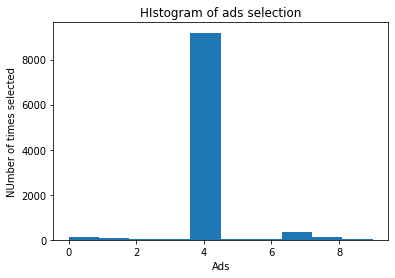

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Randomly selected ads have got the total_reward 1224 this time
#as you select it will be near 1200 almost.
#implement Ucb to maximise the total rewards

#importing the dataset
dataset=pd.read_csv("Ads_CTR_Optimisation.csv")

#Implementing THOMPSON SAMPLING
import math
import random
total_users=10000
no_ads=10
ads_selected=[]
number_reward_1=[0]*no_ads
number_reward_0=[0]*no_ads
total_reward=0
for n in range(0,total_users):
    ad=0
    max_random=0
    for i in range(0,no_ads): 
        random_beta=random.betavariate(number_reward_1[i]+1,number_reward_0[i]+1)
        
        if random_beta>max_random:
            max_random=random_beta
            ad=i
      
    ads_selected.append(ad)
    reward=dataset.values[n,ad]
    if reward==1:
       number_reward_1[ad]=number_reward_1[ad]+1
    else:
        number_reward_0[ad]=number_reward_0[ad]+1
    total_reward=total_reward+reward
    
plt.hist(ads_selected)
plt.title('HIstogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('NUmber of times selected')
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#IMPORTING THE DATASET

# this will no work dataset=pd.read_csv("Restaurant_Reviews.tsv")
#because this is not comma separated value (csv)
#this is tab seperated value(tsv)

#so use delimiter '\t' and quote=3 will also avoid double quote
dataset=pd.read_csv("Restaurant_Reviews.tsv",delimiter='\t',quoting=3)


In [8]:

#Cleaning The text like steamming
import re
import nltk
#download stopwords which is a package inside nltk for nlp
#stopwords contains a list of irrelevant words that is meaningless for 
#the review process like here for the first line 'this'

nltk.download('stopwords')  
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#dataset['Review'][0]='Wow... LOved this place.'
'''1st step Only keep the letters into the review.So we will remove all the 
letters and numbers and punctutations etc.'''

#We want to do this for alllll data
#actually corpus in NLP is collection of some texts
corpus=[]
#Write what you dont want to remove what ,we will write inside the ''.
for i in range(0,1000):
    review=re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    #lower case
    review=review.lower()
    #get rid of the irrelevant words
    review=review.split()
    #Creating stem object
    ps=PorterStemmer()
    '''go to every word in the review list and then check if it is not 
    included in the stopwords(english) list'''
    #review=[word for word in review if not word in (stopwords.words('english'))]

    #STEMMING
    #It will be applied on each word so the review will be:
    review=[ps.stem(word) for word in review if not word in (stopwords.words('english'))]
    #We want to join the elements of that review list by ' '.
    review=' '.join(review)
    #add one by one in the corpus list
    corpus.append(review)
#TEXT CLEANING DONE!!!
 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:

#Creating the BAG OF WORDS Model
'''Defining a sparse matrix where the dependent variable will be there and it will
be used to train the model in the classification after Bag or Words'''
from sklearn.feature_extraction.text import CountVectorizer
#why 1500 because see the X we have 1565 words and so we are taking 1500 frequent words
cv=CountVectorizer(max_features=1500)
'''here in countvectorizer we can also include stopwords,token[^a-zA-Z] and lowercase
maxfeature also'''
X=cv.fit_transform(corpus).toarray()

#BAG OF WORDS MODEL DONE!!!!
#take dependent variable or the review in the Y
Y=dataset.iloc[:,1].values

#NAIVE BAYES CLASSIFICATION MODEL OUR DATA IS READY

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [10]:

#WE DON'T NEED FEATURE SCALING
#Fitting the classification for the training set
#create your classifier
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,Y_train)
#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance

In [12]:

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[55, 42],
       [12, 91]])

In [13]:
print('accuracy:',(55+91)/(200))

accuracy: 0.73


In [14]:
#ARTIFICIAL NEURAL NETWORK

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=pd.read_csv("Churn_Modelling.csv")
X=dataset.iloc[:,3:13].values
Y=dataset.iloc[:,13].values

#ENCODE CATEGORICAL VARIABLE
from sklearn.preprocessing import LabelEncoder
labelencoder_x1=LabelEncoder()
labelencoder_x2=LabelEncoder()
X[:,1]=labelencoder_x1.fit_transform(X[:,1])
X[:,2]=labelencoder_x2.fit_transform(X[:,2])
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)
X=X[:,1:]

#Train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)


#Fitting the classification for the training set
#create your ARTIFICIAL NEURAL NETWORK

#Libraries


In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [16]:

#Modeling
#Initialising the Ann
classifier=Sequential()

#next line is not same with the video as mine has updated SPYDER and Keras
#here we are taking unit =6 because from experiment we come to know 
#that no of nodes in the input layer--11 and no of nodes in the output layer--1
#no of hidden layer=(1+11)/2=6

#Adding Input Layer and First Hidden Layer

classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform',input_dim=11))

#Creating second hidden layer
classifier.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))

#Creating the OUtput Layer
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

#compile the ann means we will add STOCHASTIC GRADIENT DESCENT 


In [17]:
'''apply logarithmic loss function if dependent variable has binary outcome then 
BINARY_CROSSENTROPY
#if three variables are there in the dependent variable then 
CATEGORICAL_CROSSENTROPY'''
#here binary
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#Fitting the ANN to the training set
classifier.fit(X_train,Y_train,batch_size=10,epochs=100)

#THE ULTIMATE ACCURACY IS : .8359
#Making the predictions and evaluating the model
    
#Predicting test set result
y_pred=classifier.predict(X_test)

Epoch 1/100
8000/8000 [==============================] - 1s 151us/step - loss: 0.4891 - accuracy: 0.7954
Epoch 2/100
8000/8000 [==============================] - 1s 109us/step - loss: 0.4283 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 109us/step - loss: 0.4232 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 111us/step - loss: 0.4199 - accuracy: 0.8130
Epoch 5/100
8000/8000 [==============================] - 1s 119us/step - loss: 0.4173 - accuracy: 0.8256
Epoch 6/100
8000/8000 [==============================] - 1s 114us/step - loss: 0.4150 - accuracy: 0.8261
Epoch 7/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.4136 - accuracy: 0.8294
Epoch 8/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.4127 - accuracy: 0.8326
Epoch 9/100
8000/8000 [==============================] - 1s 111us/step - loss: 0.4112 - accuracy: 0.8317
Epoch 10/100
8000/8000 [==============================]

In [18]:

#so giving threshold value 0.5 less than 0.5 will be 0 and greater will be 1
y_pred=(y_pred>0.5)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)

#we got and accuaracy of .8425 on training set

In [19]:
cm

array([[1486,  109],
       [ 186,  219]])

In [21]:
print('accuracy:',(1486+219)/(2000))

accuracy: 0.8525


In [ ]:
#CONVOLUTIONAL NEURAL NETWORK
#part 1 Building the convolutional neural network
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
'''Sequential is to initialise the neural network
Convolution2D is the package to make the convolution step in cnn
as here we are working with images so this is 2D
Maxpooling2D to add pooling layers
Flatten to convert all max pooled layers into one layer input
Dense is to add fully connected layer 
'''
#CREATING THE MODEL---------
#initialize the convolutional neural network
classifier=Sequential()

#Step 1-Convolution

'''Adding 32 feature detector and 3X3 matrix Suppose the input size is 3,256,256
so as the picture is a colored image so there will be 3 channels with size 256,256
this input shape=3.256,256 is a theano backend but we are using tensorflow backend
so the order will be changed input shape=(256,256,3)'''
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))

#Step 2 Pooling   

#to use the reduction of size of the feature map or the nodes
classifier.add(MaxPooling2D(pool_size=(2,2)))
#this line will reduce the feature map by 2

#adding second convolutional layer
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#adding third convolutional layer
classifier.add(Convolution2D(64,3,3,input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Step 3 Flattening

classifier.add(Flatten())

#Step 4 Full Connection

#Hidden layer
classifier.add(Dense(units=128,activation='relu'))

#Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

#Compiling the cnn
'''as we have binary outcome as there are only dog and cat we will choose binary cross
entropy ,if we have more than two we need to choose categorical cross entropy'''
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#IMAGE PREPROCESSING-------------
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'PetImages/training_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')
test_set= test_datagen.flow_from_directory(
        'PetImages/test_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')
classifier.fit_generator(
        training_set,
        steps_per_epoch=5996,
        epochs=10,
        validation_data=test_set,
        validation_steps=1000)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


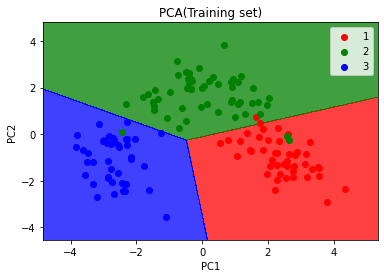

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


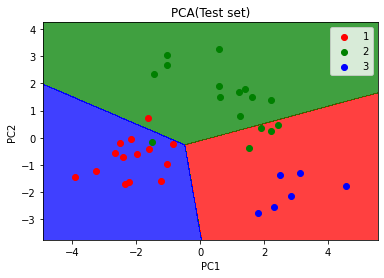

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=pd.read_csv("Wine.csv")
X=dataset.iloc[:,0:13].values
Y=dataset.iloc[:,13].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Applying PCA
'''from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_
'''
#Observe which independent variables has the impact on the dataset

#then we want most of the two principles
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_

#Fitting logistic Regression MOdel on training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('PCA(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('PCA(Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()    

In [23]:
cm

array([[ 0,  1, 13],
       [ 4, 11,  1],
       [ 6,  0,  0]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


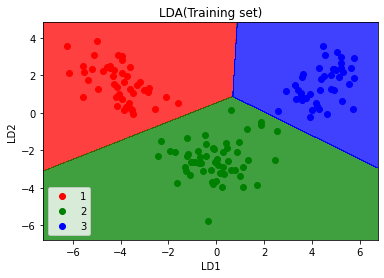

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


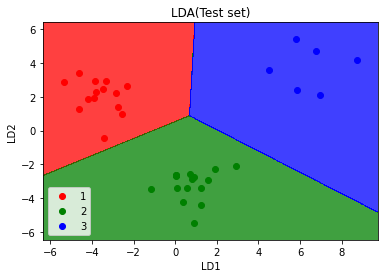

In [24]:
#Linear discriminant analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=pd.read_csv("Wine.csv")
X=dataset.iloc[:,0:13].values
Y=dataset.iloc[:,13].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Applying LDA
'''from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=None)
X_train=lda.fit_transform(X_train)
X_test=lda.fit_transform(X_test)

'''
#Observe which independent variables has the impact on the dataset

#then we want most of the two principles
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda=LDA(n_components=2)
X_train=lda.fit_transform(X_train,Y_train)
X_test=lda.fit_transform(X_test,Y_test)#different than video

#Fitting logistic Regression MOdel on training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('LDA(Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('LDA(Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()    

In [25]:
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


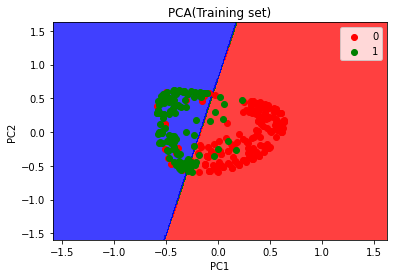

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


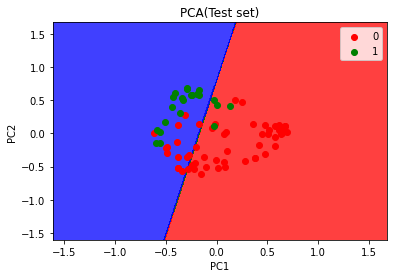

In [28]:
#kernel PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=pd.read_csv("Social_Network_Ads.csv")
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Applying kernel PCA
'''from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components=None,kernel='rbf')
X_train=kpca.fit_transform(X_train)
X_test=kpca.fit_transform(X_test)
'''
#Observe which independent variables has the impact on the dataset

#then we want most of the two principles
from sklearn.decomposition import KernelPCA
kpca=KernelPCA(n_components=2,kernel='rbf')
X_train=kpca.fit_transform(X_train)
X_test=kpca.fit_transform(X_test)

#Fitting logistic Regression MOdel on training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('PCA(Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green','blue'))(i),label=j)
plt.title('PCA(Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()    

In [29]:
cm

array([[44, 14],
       [ 4, 18]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


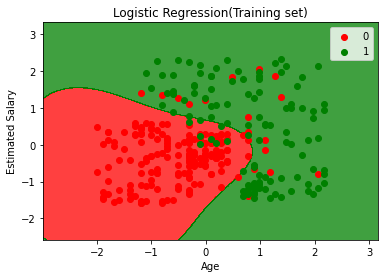

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


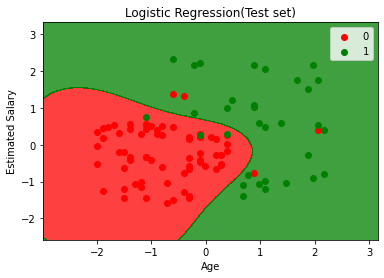

In [30]:
#GRID SEARCH
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=pd.read_csv("Social_Network_Ads.csv")
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Fitting the classification for the training set
#create your classifier
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)#gaussian kernel radial basis function
classifier.fit(X_train,Y_train)
#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Applying K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accracies=cross_val_score(estimator=classifier,X=X_train,y=Y_train,cv=10)
#if you are working on a large dataset include n_jobs=-1 
#that will use all of your cpus
accracies.mean()
accracies.std()

#mean is 90% and std is 6% so we are in low variance low bias category

#APPLYING GRID SEARCH TO FIND THE BEST MODEL AND PARAMETERS

from sklearn.model_selection import GridSearchCV
#parameters is a list of dictionaries
parameters= [{'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.5,0.7,0.4,0.2,0.1,0.01,0.001,0.0001]}]
grid_search=GridSearchCV(estimator=classifier, param_grid=parameters,
                         scoring='accuracy',cv=10,n_jobs=-1)
grid_search=grid_search.fit(X_train,Y_train)

#visualizing all model accuracy in this grid search
#see best accuracy and best paramter model for the dataset applied in grid search
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_    
#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show() 

In [31]:
best_accuracy

0.9066666666666666

In [32]:
best_parameters

{'C': 1, 'gamma': 0.7, 'kernel': 'rbf'}

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


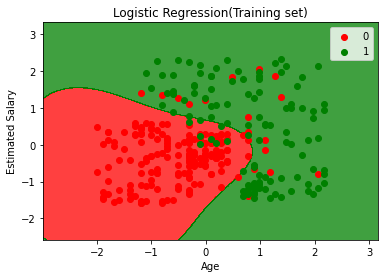

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


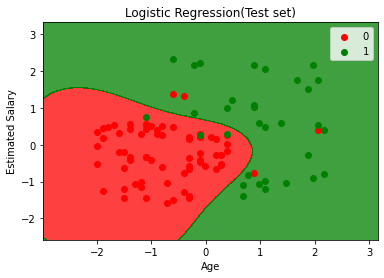

In [34]:
#k fold cross validation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=pd.read_csv("Social_Network_Ads.csv")
X=dataset.iloc[:,[2,3]].values
Y=dataset.iloc[:,4].values

#splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train) 
X_test=sc_x.transform(X_test)

#Fitting the classification for the training set
#create your classifier
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)#gaussian kernel radial basis function
classifier.fit(X_train,Y_train)
#Predicting test set result
y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
#just write cm in the console
#here 65 and 24 are the correct prediction and 3 and 8 are incorrect

#We will make A graph to see the boundaries and other visualisation

#Applying K FOLD CROSS VALIDATION
from sklearn.model_selection import cross_val_score
accracies=cross_val_score(estimator=classifier,X=X_train,y=Y_train,cv=10)
#if you are working on a large dataset include n_jobs=-1 
#that will use all of your cpus
accracies.mean()
accracies.std()

#mean is 90% and std is 6% so we are in low variance low bias category
    
#Visualising the train set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_train,Y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()    

#Visualising the test set result

from matplotlib.colors import ListedColormap
x_set,y_set=X_test,Y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [35]:
#XGBOOST
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import the dataset
dataset=pd.read_csv("Churn_Modelling.csv")
X=dataset.iloc[:,3:13].values
Y=dataset.iloc[:,13].values

#ENCODE CATEGORICAL VARIABLE
from sklearn.preprocessing import LabelEncoder
labelencoder_x1=LabelEncoder()
labelencoder_x2=LabelEncoder()
X[:,1]=labelencoder_x1.fit_transform(X[:,1])
X[:,2]=labelencoder_x2.fit_transform(X[:,2])
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Country", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)
X=X[:,1:]

#Train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#fitting XGBOOST in the training set
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X_train,Y_train)

y_pred=classifier.predict(X_test)
#Make the Confusion Matrix
#to evaluate the model performance
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)

#accuracy
from sklearn.model_selection import cross_val_score
accracies=cross_val_score(estimator=classifier,X=X_train,y=Y_train,cv=10)
#if you are working on a large dataset include n_jobs=-1 
#that will use all of your cpus
accracies.std()

0.01017042280340401

In [36]:
accracies.mean()


0.8625

In [37]:
cm

array([[1521,   74],
       [ 197,  208]])